In [ ]:

import nltk
nltk.download('punkt')
nltk.download('wordnet')
from nltk import sent_tokenize, word_tokenize
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords
import pandas as pd
import numpy as np
import re  
import spacy
import spacy.cli 
spacy.cli.download("en_core_web_lg")
nlp = spacy.load('en_core_web_lg')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_lg')


In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

## Performing Initial Analysis of Data

### Data Cleaning and Preparation

In [ ]:
hashtag_data = pd.read_csv('complete_data.csv')
phrase_data = pd.read_csv('phrase_data.csv')

In [ ]:
hashtag_data.drop('Unnamed: 0',axis=1,inplace=True)
phrase_data.drop('Unnamed: 0',axis=1,inplace=True)

In [ ]:
hashtag_data.head()

,tweet,likes,date_posted
0,RT @org_scp: 🚨 We call on @SpursOfficial #COYS...,0,2021-07-27 22:51:32
1,RT @org_scp: 🚨 We call on @SpursOfficial #COYS...,0,2021-07-27 22:34:57
2,RT @org_scp: 🚨 We call on @SpursOfficial #COYS...,0,2021-07-27 21:56:26
3,RT @org_scp: 🚨 We call on @SpursOfficial #COYS...,0,2021-07-27 21:52:35
4,RT @org_scp: 🚨 We call on @SpursOfficial #COYS...,0,2021-07-27 20:40:30


In [ ]:
phrase_data.head()

,tweet,likes,date
0,RT @YanitedAlways: 100 days today since the Eu...,0,2021-07-27 23:44:03
1,RT @YanitedAlways: 100 days today since the Eu...,0,2021-07-27 23:41:17
2,100 days today since the European Super League...,15,2021-07-27 23:33:54
3,RT @MayowaQuadri_: I knew something was up whe...,0,2021-07-27 23:23:38
4,RT @MayowaQuadri_: I knew something was up whe...,0,2021-07-27 23:23:09


In [ ]:
text = phrase_data.tweet


In [ ]:
sentences = []

for i in text:
  sentences.append(i)

In [ ]:
split_words = []

for sentence in sentences:
  words = sentence.split()
  for word in words:
    split_words.append(word.lower())


In [ ]:
#removing punctuation
split_words_np = [re.sub('r*[^A-Za-z0-9]+','',x) for x in split_words]
for word in split_words_np:
  if word.startswith('http'):
    split_words_np.remove(word)
split_words_np

['rt',
 'yanitedalways',
 '100',
 'days',
 'today',
 'since',
 'the',
 'european',
 'super',
 'league',
 'collapsed',
 'youll',
 'never',
 'beat',
 'us',
 'football',
 'fans',
 'rt',
 'yanitedalways',
 '100',
 'days',
 'today',
 'since',
 'the',
 'european',
 'super',
 'league',
 'collapsed',
 'youll',
 'never',
 'beat',
 'us',
 'football',
 'fans',
 '100',
 'days',
 'today',
 'since',
 'the',
 'european',
 'super',
 'league',
 'collapsed',
 'youll',
 'never',
 'beat',
 'us',
 'football',
 'fans',
 'rt',
 'mayowaquadri',
 'i',
 'knew',
 'something',
 'was',
 'up',
 'when',
 'florentino',
 'prez',
 'was',
 'trying',
 'to',
 'convince',
 'everyone',
 'to',
 'join',
 'the',
 'european',
 'super',
 'league',
 'you',
 'w',
 'rt',
 'mayowaquadri',
 'i',
 'knew',
 'something',
 'was',
 'up',
 'when',
 'florentino',
 'prez',
 'was',
 'trying',
 'to',
 'convince',
 'everyone',
 'to',
 'join',
 'the',
 'european',
 'super',
 'league',
 'you',
 'w',
 'rt',
 'theopaphitis4',
 'lufcjake14',
 'polit

In [ ]:
#stemming words to their root

english_stemmer = SnowballStemmer(language='english')

stemmed_words = []
for word in split_words_np:
  stemmed_words.append(english_stemmer.stem(word))

In [ ]:
sw = stopwords.words('english')
sw.append('rt')
sw.append('http')

In [ ]:
#removing stop words
clean_words = []

for i in stemmed_words:
  if i not in sw:
    clean_words.append(i)

In [ ]:
clean_words_df = pd.DataFrame(clean_words, columns=['words'])

In [ ]:
word_frequency = clean_words_df.words.value_counts()

### Word Frequencies and Entity Recognition

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'Frequency in tweets')

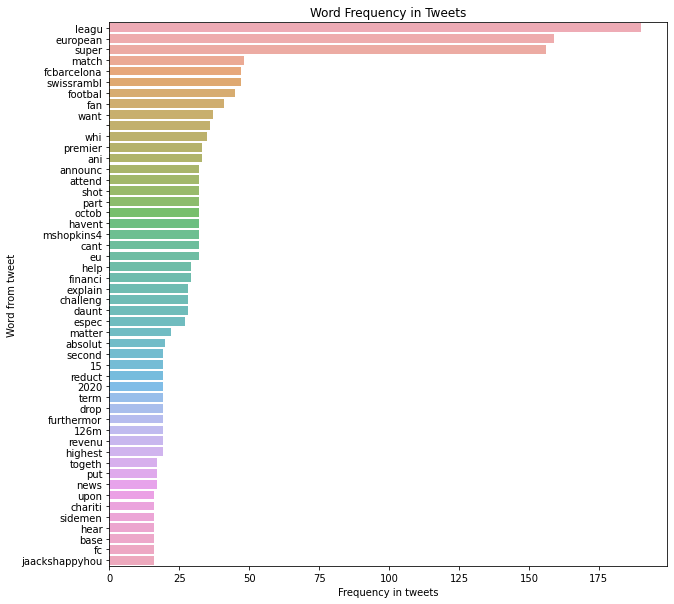

In [ ]:
#Graphing word frequency

plt.figure(figsize=(10,10))
sns.barplot(word_frequency.values[:50],word_frequency.index[:50],alpha=.8)
plt.title('Word Frequency in Tweets')
plt.ylabel('Word from tweet')
plt.xlabel('Frequency in tweets')

In [ ]:
#Basic Entity recognition using spacy
str1 = ' '
stem2 = str1.join(clean_words)
stem2 = nlp(stem2)

label = [(X.text, X.label_) for X in stem2.ents]

df_6 = pd.DataFrame(label,columns=['Word','Entity'])

In [ ]:
df_6

,Word,Entity
0,yanitedalway,PERSON
1,100 day,DATE
2,today,DATE
3,footbal,ORG
4,yanitedalway,PERSON
...,...,...
581,saturday,DATE
582,announc,PERSON
583,leagu footbal,PERSON
584,announc,PERSON


In [ ]:
df_6.Entity.unique()

array(['PERSON', 'DATE', 'ORG', 'NORP', 'GPE', 'CARDINAL', 'TIME',
       'ORDINAL', 'LANGUAGE', 'MONEY'], dtype=object)

In [ ]:
money_df = df_6.where(df_6['Entity']=='MONEY')
org_df = df_6.where(df_6['Entity']=='ORG')
norp_df = df_6.where(df_6['Entity']=='NORP')

In [ ]:
money_df = money_df['Word'].value_counts()
org_df = org_df['Word'].value_counts()
norp_df = norp_df['Word'].value_counts()

Text(0.5, 0, 'Frequency in tweets')

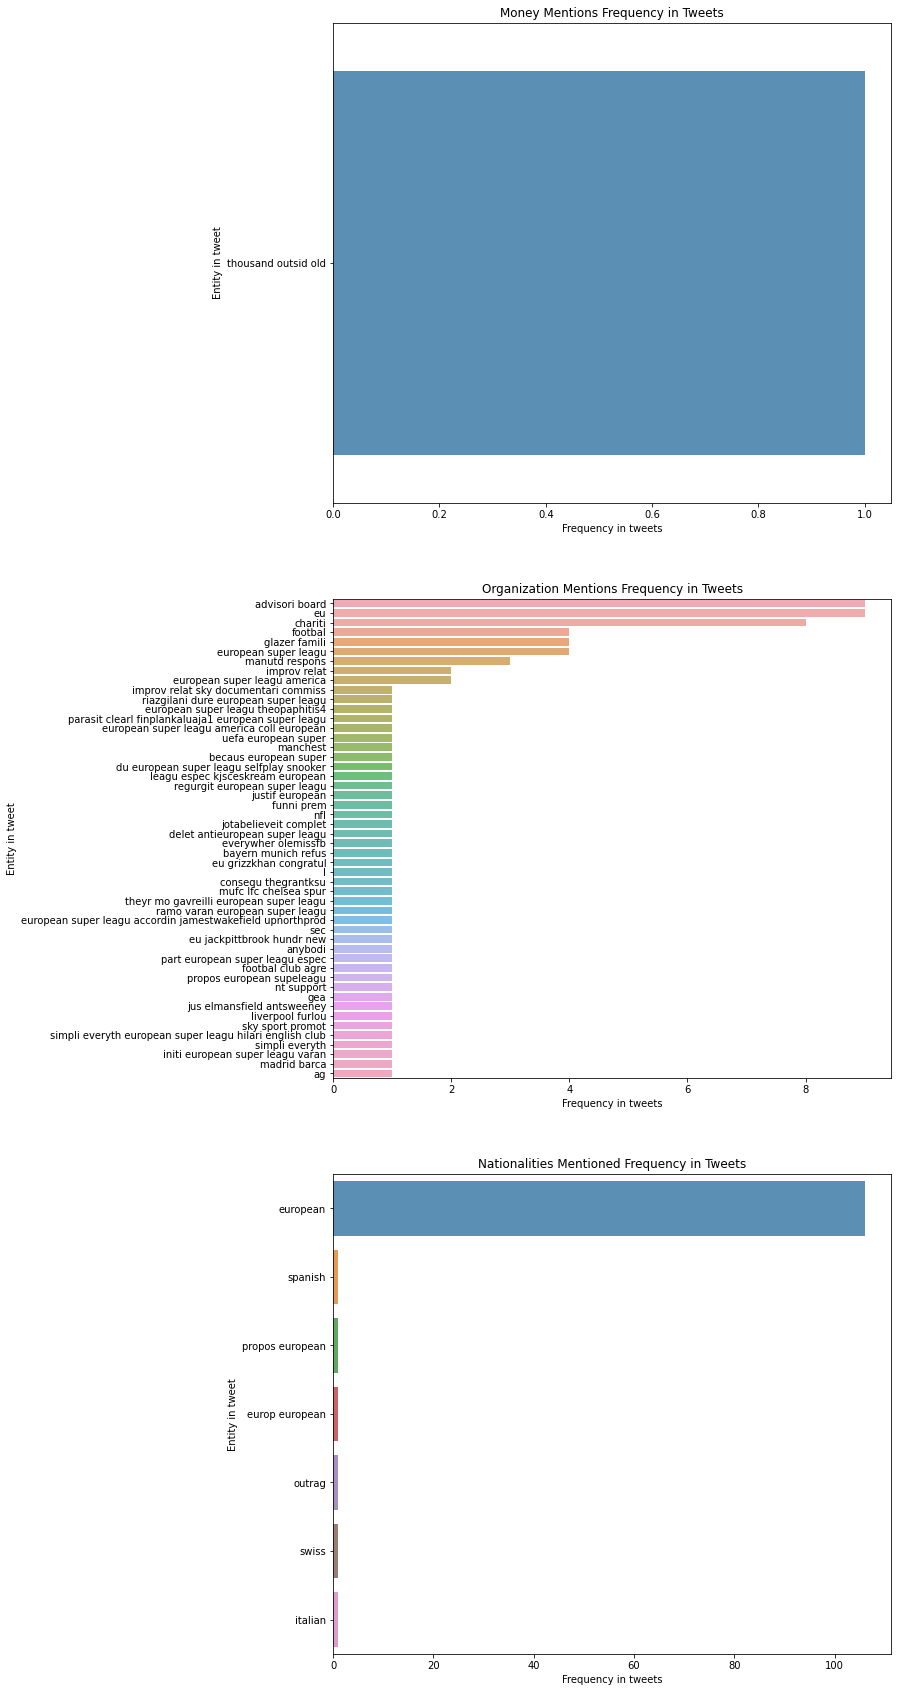

In [ ]:
plt.figure(figsize=(10,30))
#money mentions
plt.subplot(3,1,1)
sns.barplot(x = money_df.values[:50], y = money_df.index[:50],alpha=.8)
plt.title('Money Mentions Frequency in Tweets')
plt.ylabel('Entity in tweet')
plt.xlabel('Frequency in tweets')
#org mentions
plt.subplot(3,1,2)
sns.barplot(x = org_df.values[:50],y = org_df.index[:50],alpha=.8)
plt.title('Organization Mentions Frequency in Tweets')
plt.ylabel('Entity in tweet')
plt.xlabel('Frequency in tweets')
#norp mentions
plt.subplot(3,1,3)
sns.barplot(x = norp_df.values[:50],y = norp_df.index[:50],alpha=.8)
plt.title('Nationalities Mentioned Frequency in Tweets')
plt.ylabel('Entity in tweet')
plt.xlabel('Frequency in tweets')
